# Flight Price:

## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd
df = pd.read_excel("flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [2]:
print("The Dimension of flight price dataset: {}".format(df.shape))
print(f"The no of columns present in price datasets is : {df.shape[1]}")
print(f"The no of rows present in price datasets is  : {df.shape[0]}")

The Dimension of flight price dataset: (10683, 11)
The no of columns present in price datasets is : 11
The no of rows present in price datasets is  : 10683


## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

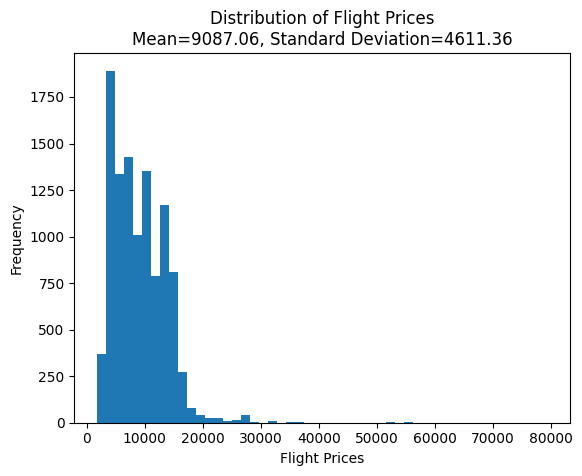

In [3]:
import matplotlib.pyplot as plt

# Assuming the flight prices are stored in a column called 'Price' in a pandas DataFrame called 'df'
flight_prices = df['Price']


# Calculate the mean and standard deviation of the flight prices
mean = flight_prices.mean()
std_dev = flight_prices.std()

# Create a histogram with 50 bins
plt.hist(flight_prices, bins=50)

# Set x-axis label
plt.xlabel('Flight Prices')

# Set y-axis label
plt.ylabel('Frequency')

# Set plot title with mean and standard deviation
plt.title('Distribution of Flight Prices\nMean={:.2f}, Standard Deviation={:.2f}'.format(mean, std_dev))

# Display the plot
plt.show()

In [4]:
skewness = flight_prices.skew()

# Print the skewness of the flight prices
print('Skewness of Flight Prices: {:.2f}'.format(skewness))

Skewness of Flight Prices: 1.81


## Observation
The `skewness` of flight prices in the dataset is `1.81`, then we can conclude that the distribution of `flight prices` is positively skewed. A positive skewness indicates that the tail of the distribution extends more to the right than to the left, and the mean of the distribution is greater than the median. In this case, it suggests that there are some flights with very high prices that are pulling the mean upward, while the majority of flights have lower prices.

## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
price_range = df['Price'].max() - df['Price'].min()
print("Range of prices in the dataset: {}".format(price_range))
print(f"The minimum price of datasets is : {df['Price'].min()}")
print(f"The maximum price of datasets is : {df['Price'].max()}")

Range of prices in the dataset: 77753
The minimum price of datasets is : 1759
The maximum price of datasets is : 79512


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

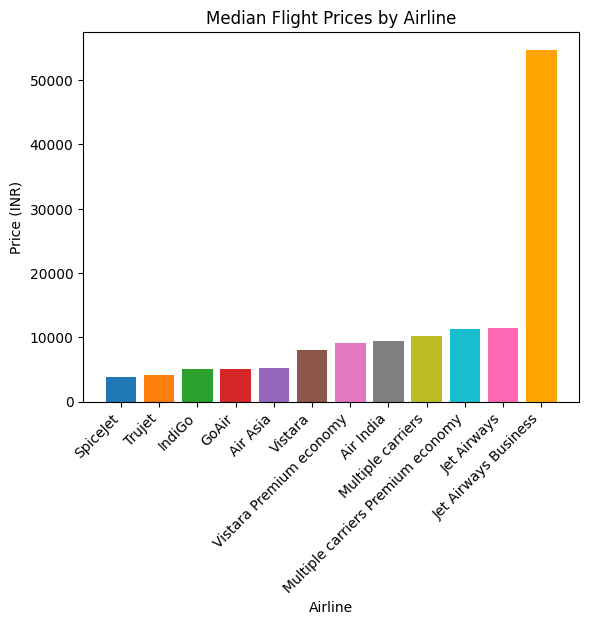

In [6]:
# calculate median flight prices by airline
airline_median_prices = df.groupby("Airline")["Price"].median().sort_values()

# define custom colors for the plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FF69B4', '#FFA500']

# plot the median flight prices by airline as a bar graph
plt.bar(x=airline_median_prices.index, height=airline_median_prices.values, color=colors)

# set the title and axis labels
plt.title("Median Flight Prices by Airline")
plt.xlabel("Airline")
plt.ylabel("Price (INR)")

# rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# display the plot
plt.show()

The `highest` median price is for `Jet Airways Business`, which is significantly higher than the median price of any other airline. This suggests that `Jet Airways` Business is a premium airline with higher fares.

The `lowest` median price is for Trujet, which is significantly lower than the median price of any other airline. This suggests that Trujet is a budget airline with lower fares.

The median prices for other `airlines fall` in between these two extremes, with some airlines like Air Asia, SpiceJet, and Vistara being relatively more affordable, and others like Air India, Jet Airways, and Multiple carriers having higher median prices.

Overall, this analysis suggests that the price of flights varies significantly by airline, with some airlines offering premium services at higher prices, and others offering budget services at lower prices.

In [7]:
df_airline = df[["Airline","Price"]]

In [8]:
df_airline["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

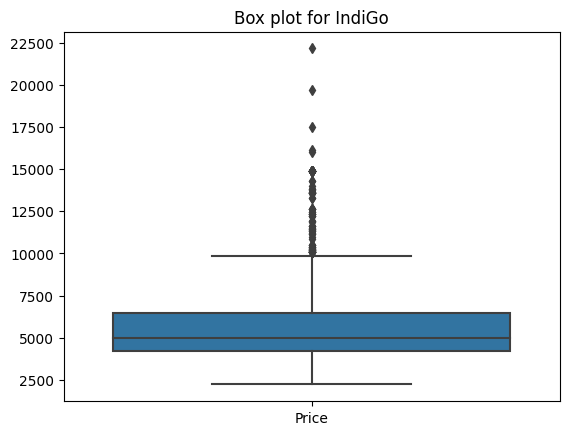

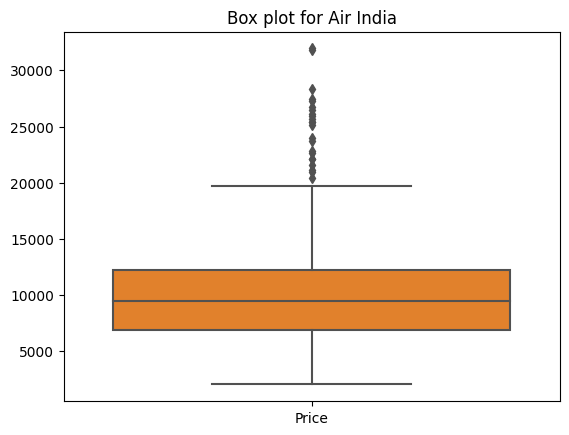

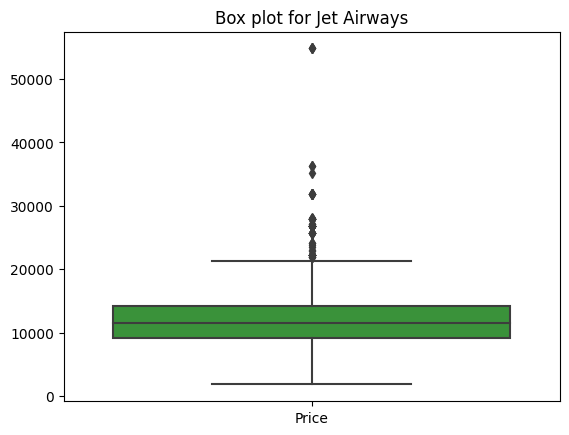

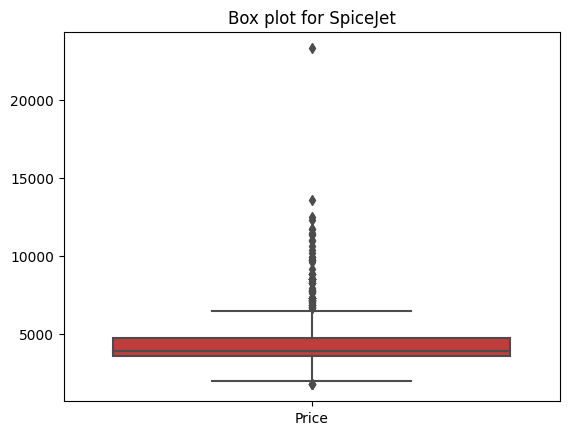

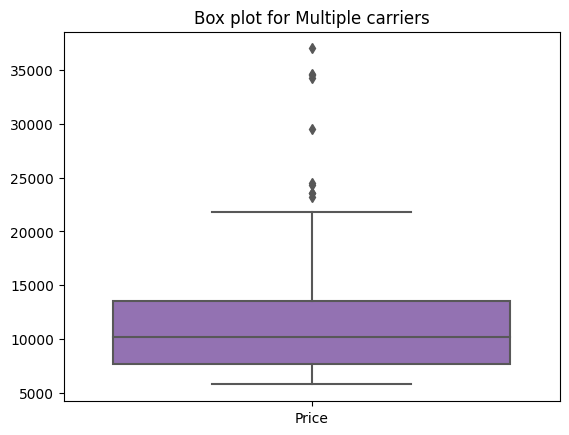

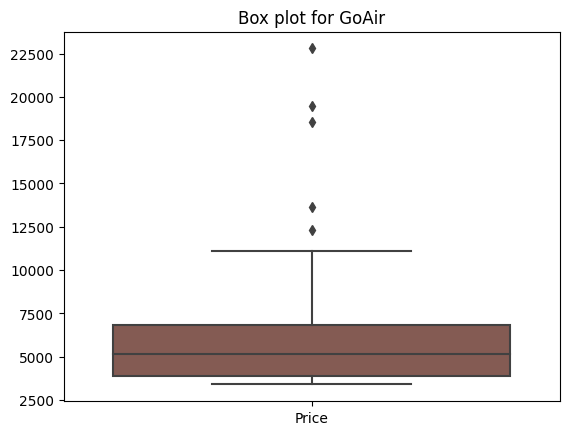

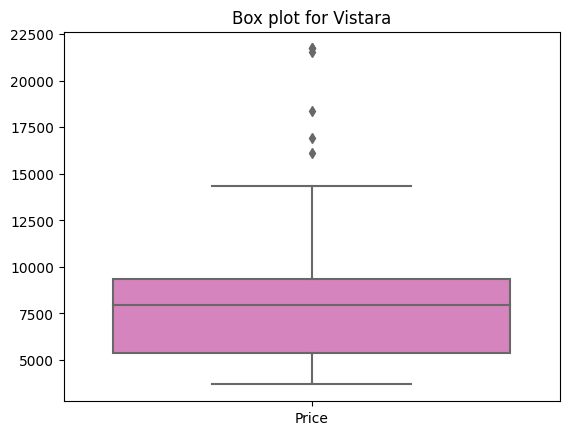

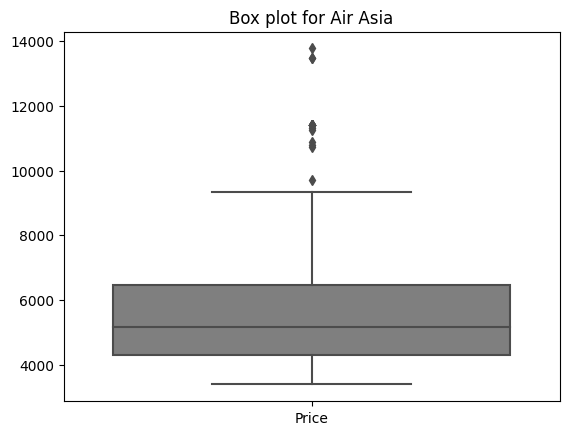

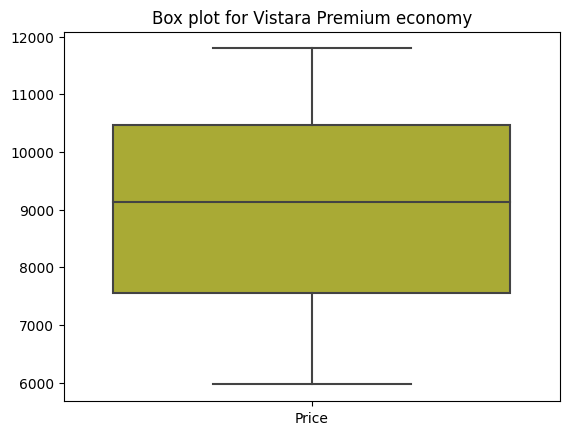

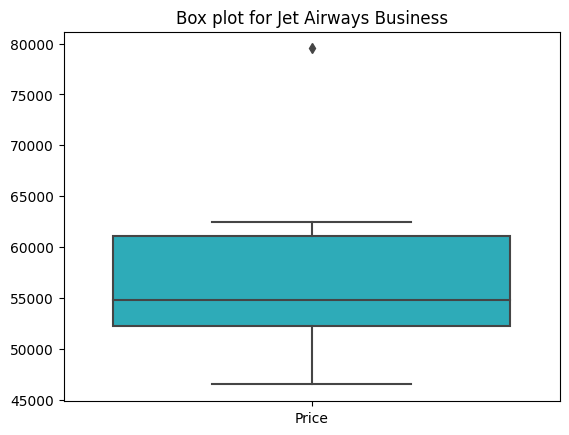

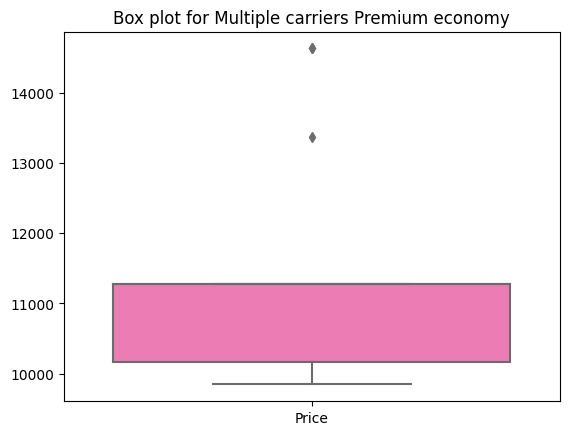

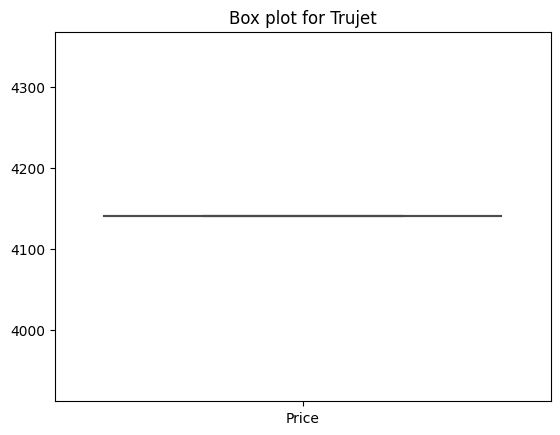

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FF69B4', '#FFA500']
# create a list of unique airlines in the dataset
airlines = df_airline["Airline"].unique()

# create a box plot for each airline in the dataset
for i in enumerate(df_airline["Airline"].unique()):
   
     sns.boxplot(df_airline[df_airline["Airline"]==i[1]], color=colors[i[0]])
     plt.title("Box plot for {}".format(i[1]))
     plt.show()


## Interpretation
In above all fiqure the quartiles `(Q1, Q2, and Q3)` lie above the center line in a box plot, it means that the median value is closer to the upper quartile (Q3) and the data is skewed to the right, or positively skewed. This indicates that the data has a tail towards the higher values and has more outliers on the upper end of the distribution.

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

<Axes: >

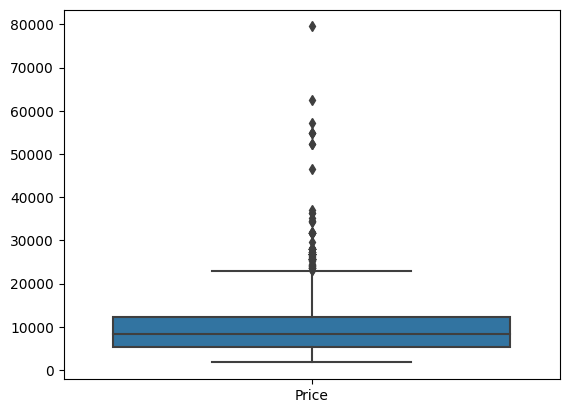

In [10]:
# Create a boxplot
sns.boxplot(df)

## Yes, there is oulier in the datasets which are potientially skrewing the datasets.

### Outliers can have a significant impact on our analysis, as they can skew the results and affect the accuracy of statistical models. Therefore, it is important to identify and remove outliers from the dataset before performing any analysis. This can be done using various methods such as Z-score, IQR method, or visual inspection of the data. Once outliers have been identified, we can either remove them from the dataset or transform the data to reduce their impact.

## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

To identify the peak travel season in the Flight Price dataset, there are several features that can be analyzed, such as:

1. `Time of year`: The dataset includes the date of each flight, so you can analyze which months have the highest average flight prices.

2. `Destination`: You can analyze which destinations have the highest average flight prices during different times of the year.

3. `Day of week`: You can analyze which days of the week have the highest average flight prices.

4. `Airline`: You can analyze which airlines have the highest average flight prices during different times of the year.

To present your findings to your boss, you could create several visualizations, such as:

1. `Line charts` showing the average flight prices over time, broken down by month.

2. `Bar charts` showing the average flight prices for different destinations, broken down by month.

3. `Heatmaps` showing the average flight prices for each day of the week and each month.

 4. `Stacked bar charts` showing the average flight prices for each airline, broken down by month.

These visualizations can help identify patterns and trends in the data, making it easier to identify the peak travel season. Based on the findings, you can then recommend the best time of year to offer travel deals or promotions to your customers

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

As a data analyst for a flight booking website, to identify trends in flight prices, I would start by analyzing the following features:

1. `Date/Time of booking`: Analyzing the date and time of bookings can help identify any patterns or trends in flight prices. This could include looking at the day of the week, month, or even time of day.

2. `Origin and destination`: Analyzing flight prices based on the origin and destination of flights can help identify any trends or patterns in pricing based on specific routes.

3. `Airline`: Analyzing flight prices based on the airline can help identify any trends or patterns in pricing based on specific airlines.

4. `Duration of the fligh`t: Analyzing flight prices based on the duration of the flight can help identify any trends or patterns in pricing based on specific flight lengths.

To present my findings to the team, I would use visualizations such as line charts, scatter plots, and heat maps. Line charts could be used to show trends over time, while scatter plots could be used to show the relationship between two variables such as flight duration and price. Heat maps could be used to show the distribution of flight prices across different routes, dates, and airlines. Additionally, box plots could be used to visualize the distribution of flight prices for each airline or route. By analyzing these features and using appropriate visualizations, we can identify trends and patterns in flight prices, and make data-driven decisions to optimize pricing and maximize revenue

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

As a data scientist working for an airline company, if I have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices, the following features would be helpful to identify these factors:

1. `Airline`: Different airlines have different pricing strategies and may offer different services that impact flight prices.
2. `Source and Destination`: The distance between the source and destination cities may affect the flight prices.
3. `Date of Journey`: The time of the year or specific dates may impact flight prices due to seasonal variations or peak travel times.
4. `Departure and Arrival Time`: The time of day may impact flight prices due to demand and supply factors.
5. `Number of Stops`: Flights with more stops may have lower prices than direct flights due to the inconvenience of multiple stops.

To present my findings to the management team, I would create visualizations such as scatterplots, heatmaps, and regression models to identify the correlation between these features and flight prices. Additionally, I would perform statistical tests such as ANOVA to identify any significant differences in flight prices among different airlines or between different times of the year. I would then create a report highlighting the key factors that impact flight prices and provide recommendations on how the airline company can optimize its pricing strategy based on these factors.

 # Google Playstore:

## Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
import pandas as pd
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
print("The Dimension of Google Playstore dataset: {}".format(df.shape))
print(f"The no of columns present in Google Playstore dataset : {df.shape[1]}")
print(f"The no of rows present in  Google Playstore dataset : {df.shape[0]}")

The Dimension of Google Playstore dataset: (10841, 13)
The no of columns present in Google Playstore dataset : 13
The no of rows present in  Google Playstore dataset : 10841


## Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

In [12]:
df_copy = df.copy()

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
df_category_rating = df_copy[["Category","Rating"]]
df_category_rating

,Category,Rating
0,ART_AND_DESIGN,4.1
1,ART_AND_DESIGN,3.9
2,ART_AND_DESIGN,4.7
3,ART_AND_DESIGN,4.5
4,ART_AND_DESIGN,4.3
...,...,...
10836,FAMILY,4.5
10837,FAMILY,5.0
10838,MEDICAL,NaN
10839,BOOKS_AND_REFERENCE,4.5


In [15]:
len(df_category_rating["Category"].unique())

34

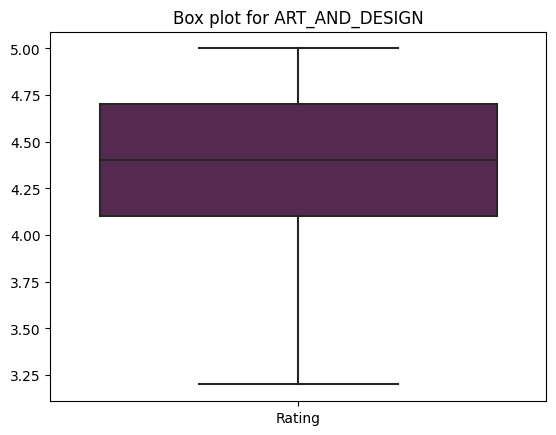

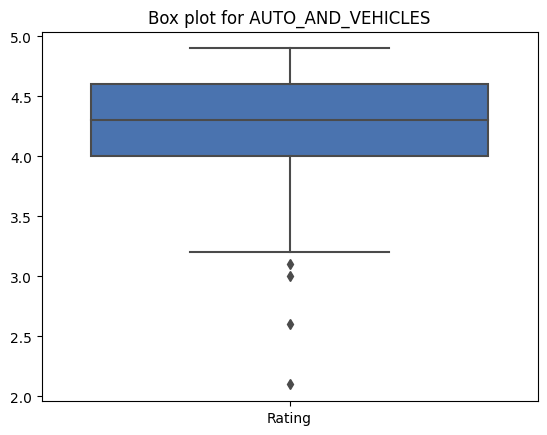

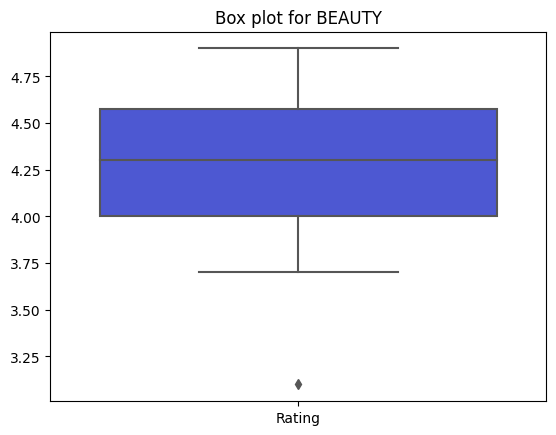

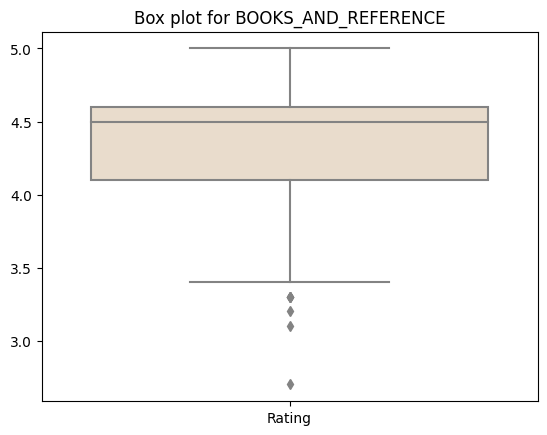

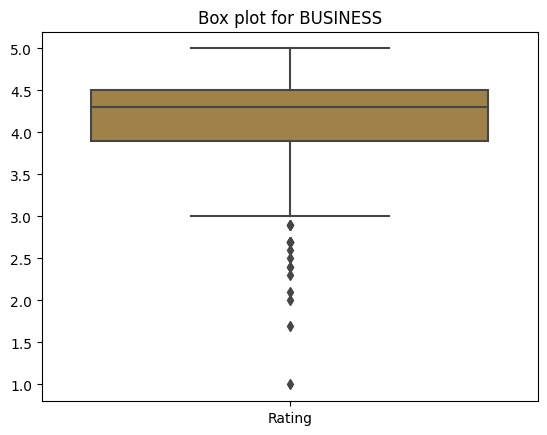

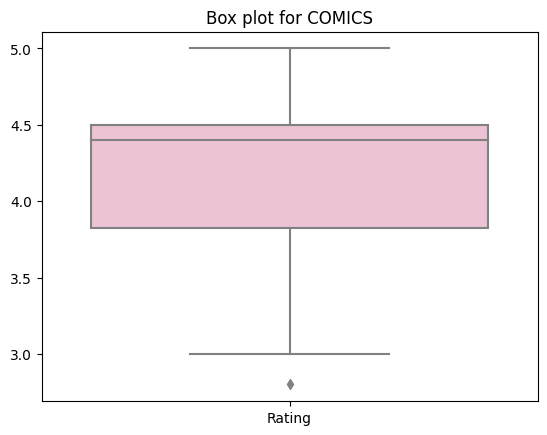

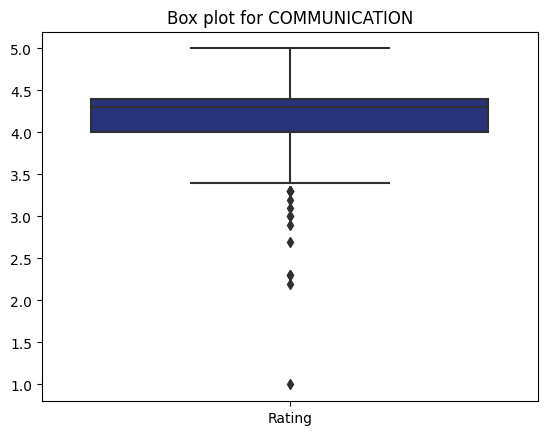

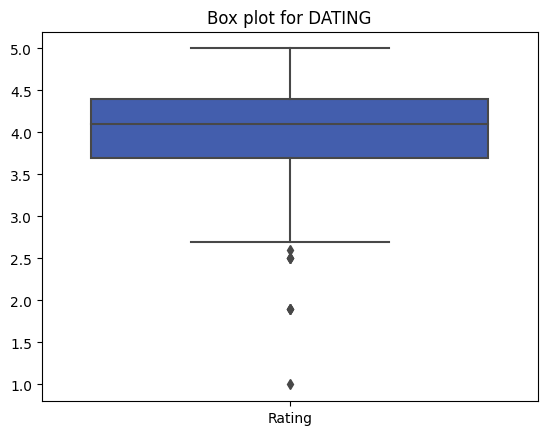

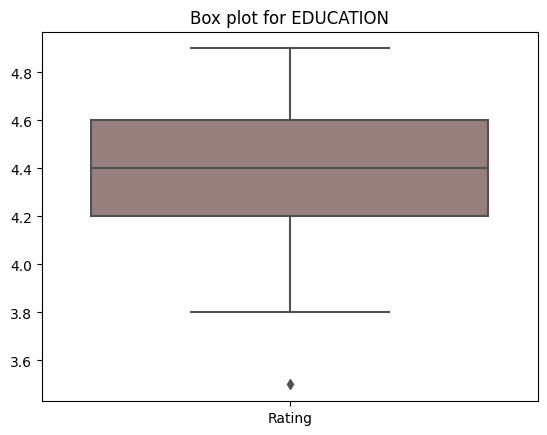

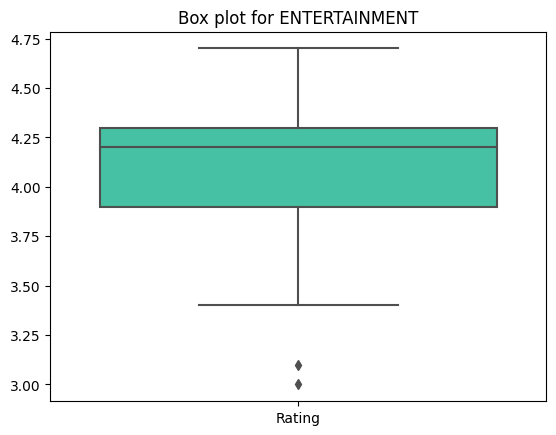

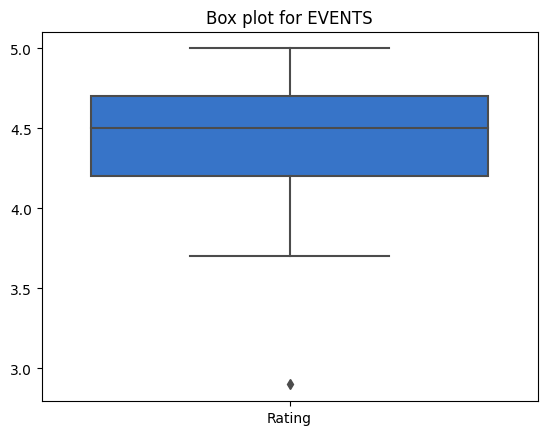

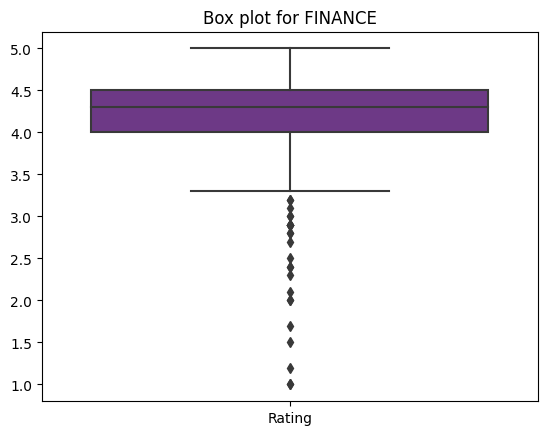

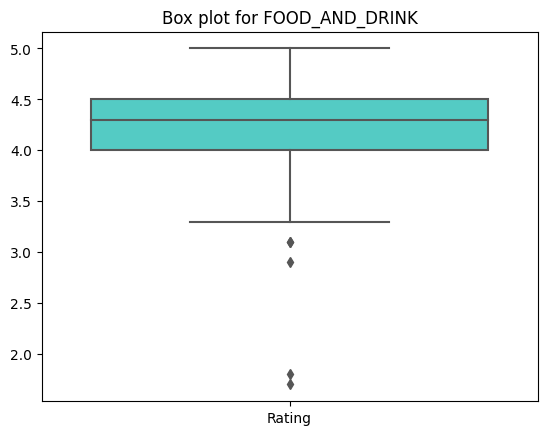

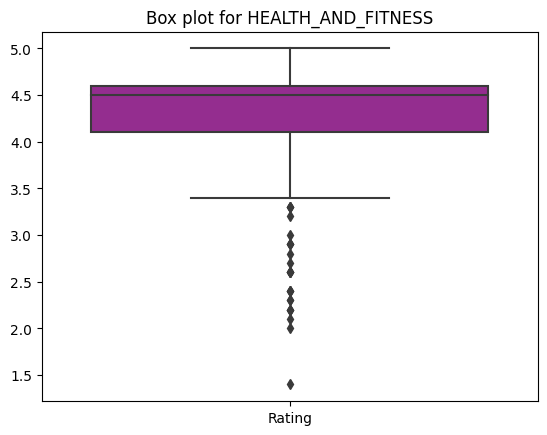

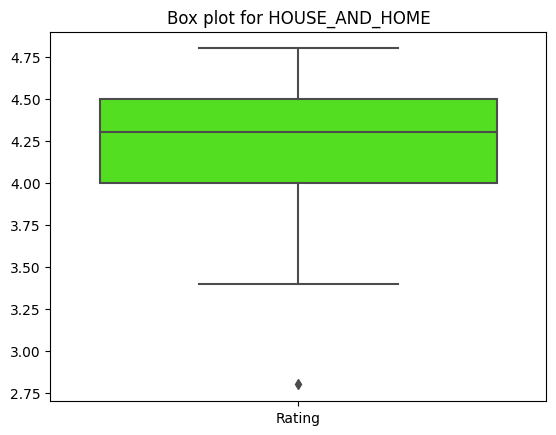

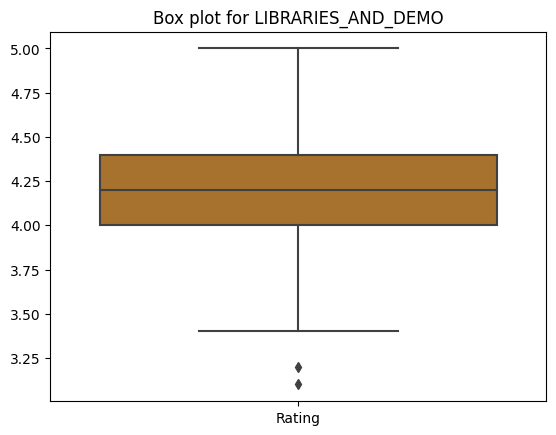

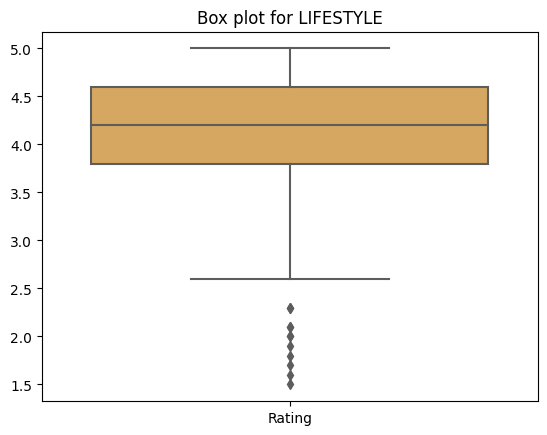

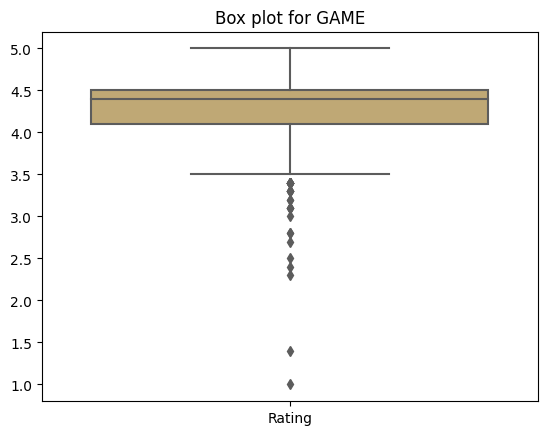

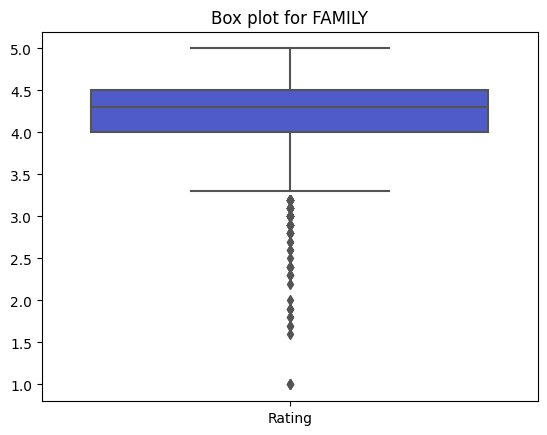

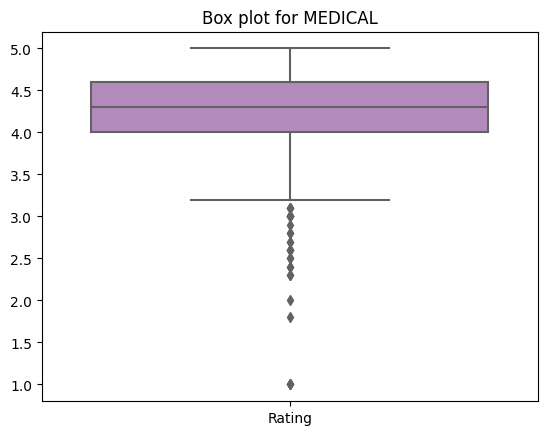

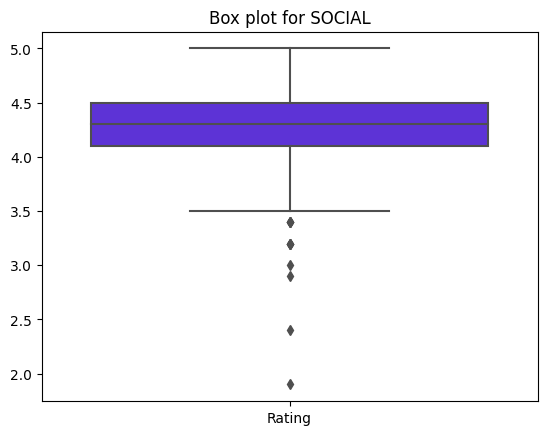

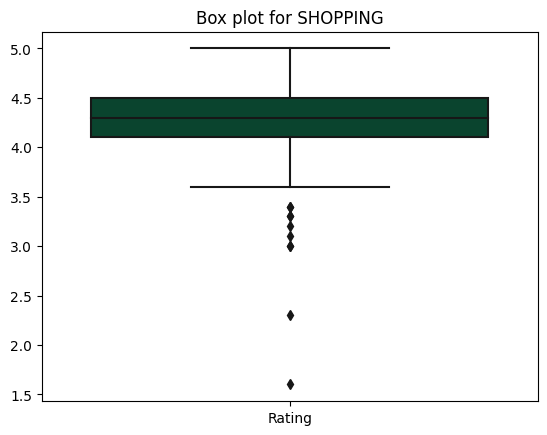

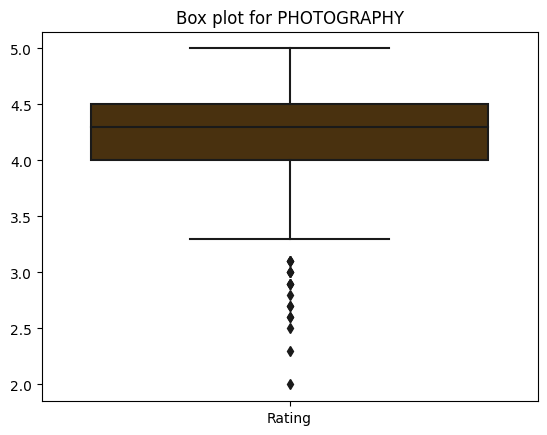

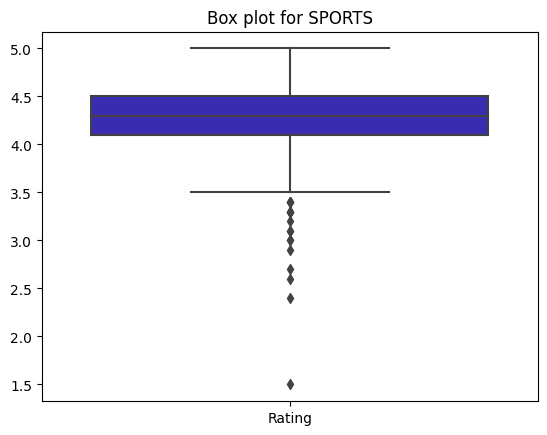

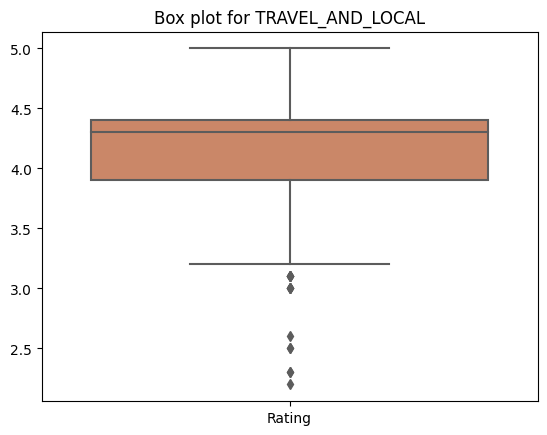

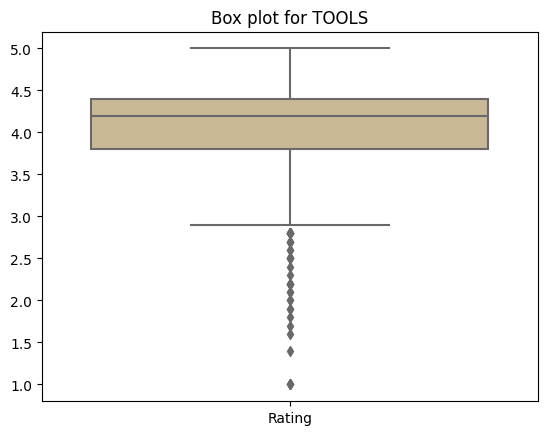

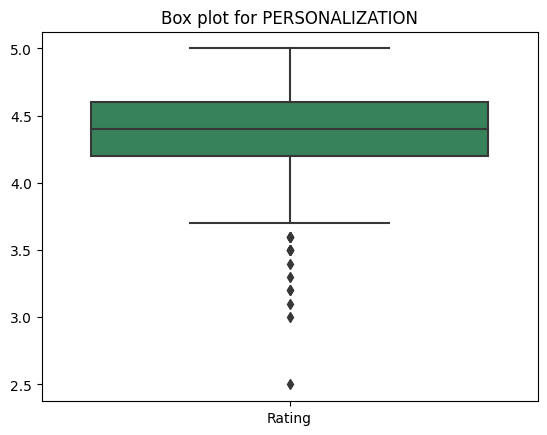

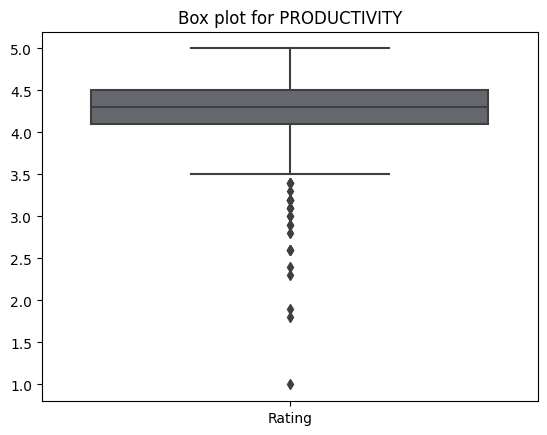

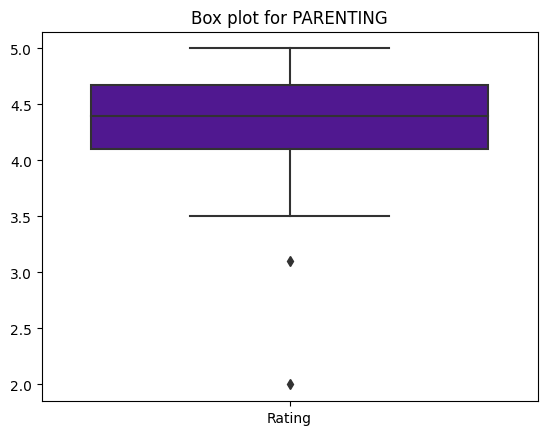

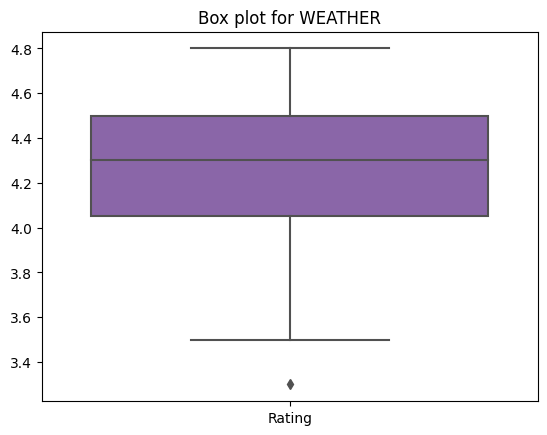

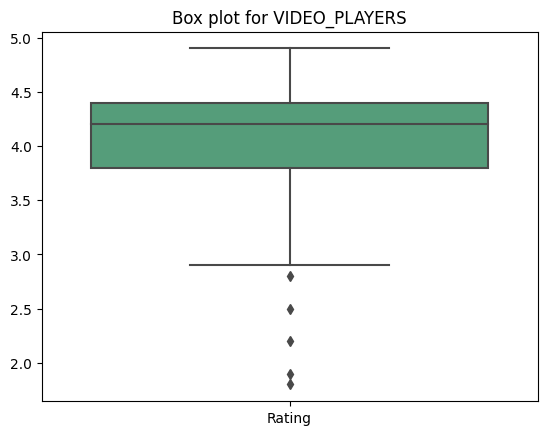

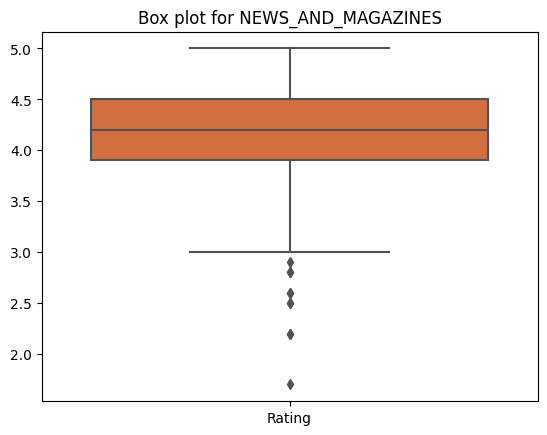

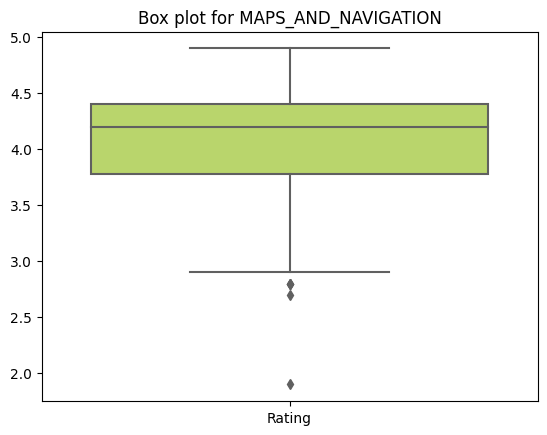

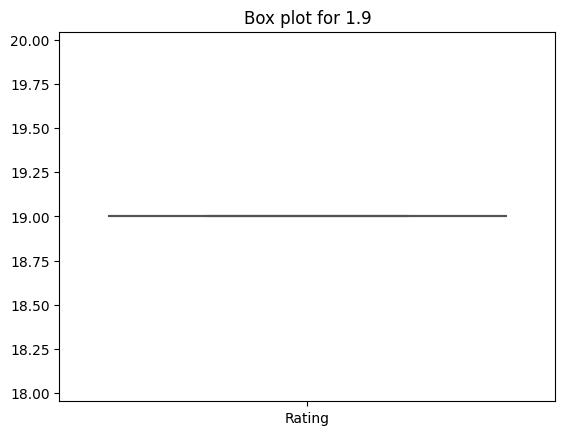

In [16]:
import random
import seaborn as sns

import matplotlib.pyplot as plt

for i in enumerate(df_category_rating["Category"].unique()):
    sns.boxplot(df_category_rating[df_category_rating["Category"]==i[1]], color = (random.randint(0, 255)/255,random.randint(0, 255)/255,random.randint(0, 255)/255))
    plt.title("Box plot for {}".format(i[1]))
    plt.show()

## Interpretation
In above fiqure the quartiles `(Q1, Q2, and Q3)` lie below the center line in a box plot, it means that the median value is closer to the lower quartile (Q3) and the data is skewed to the left, or negatively skewed. This indicates that the data has a head towards the higher values and has more outliers on the lower end of the distribution.

<Axes: xlabel='Category'>

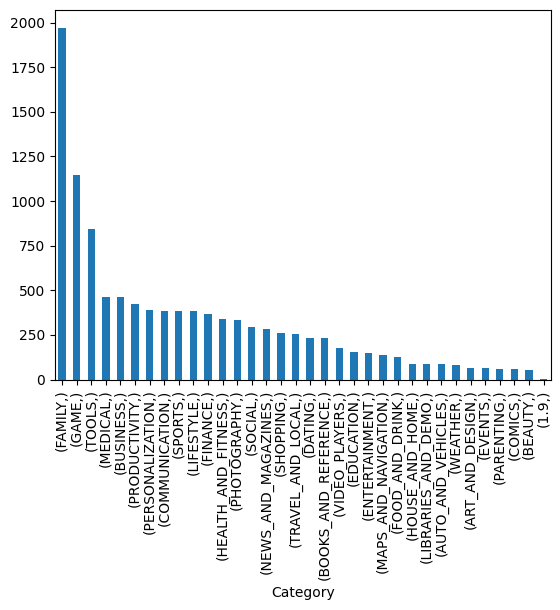

In [17]:
df_copy[["Category"]].value_counts().plot(kind="bar")

### The numbers on the right side of each category name represent the frequency count of that category in the dataset. For example, there are 1972 apps in the FAMILY category, 1144 in GAME, 843 in TOOLS, and so on.
 
### It is worth noting that there is a category with a value of 1.9, which seems to be an anomaly or an error in the dataset, since it is not a valid category name. This could be an issue that needs to be addressed before using the dataset for analysis.

## Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [18]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Observation
- 1. The Datasets have 1474 missing value in `Ratings` column.
- 2. The Datasets has  1 missing vakue in `Type` column.
- 3. The Datasets has  1 missing vakue in `Content Rating` column.
- 4. The Datasets has  8 missing vakue in `Current Ver` column.
- 5. The Datasets has  3 missing vakue in `Android Ver` column.

Missing values in a dataset can impact your analysis in different ways, depending on the type and amount of missing data. Here's how each column with missing data in this dataset may impact your analysis:

- 1. `Ratings column`: The 1474 missing values in the Ratings column represent about 13% of the total observations in that column. Depending on the analysis you're planning to conduct, you may choose to remove those observations or impute the missing values using techniques such as mean or median imputation, regression imputation, or multiple imputation. The choice of imputation method can impact the results of your analysis, so it's important to choose a method that is appropriate for your data and analysis.

- 2. `Type column`: The 1 missing value in the Type column represents a very small portion of the data, and it's unlikely to significantly impact your analysis. You can choose to remove that observation or impute the missing value using a simple imputation method such as mode imputation.

- 3. `Content Rating column`: The 1 missing value in the Content Rating column also represents a very small portion of the data, and it's unlikely to significantly impact your analysis. You can choose to remove that observation or impute the missing value using a simple imputation method such as mode imputation.

- 4. `Current Ver column`: The 8 missing values in the Current Ver column represent a small portion of the data, but they may impact your analysis if you're planning to conduct an analysis that requires version information. If the missing values are randomly distributed, you can choose to remove those observations or impute the missing values using an appropriate imputation method such as mean or regression imputation. If the missing values are not randomly distributed, you may need to investigate the reasons for the missing data and use an appropriate imputation method based on your findings.

- 5. `Android Ver column`: The 3 missing values in the Android Ver column represent a small portion of the data, but they may impact your analysis if you're planning to conduct an analysis that requires Android version information. Similar to the Current Ver column, you can choose to remove those observations or impute the missing values using an appropriate imputation method based on the nature and distribution of the missing data.

 ## Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

In [32]:
df_size_rating = df[["Size", "Rating"]]
df_size_rating.isnull().sum()

Size         0
Rating    1474
dtype: int64

In [33]:
df_size_rating.dropna(inplace=True)

In [34]:
df_size_rating.isnull().sum()

Size      0
Rating    0
dtype: int64

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
df_size_rating["Size"].sort_values()

10472                1,000+
10043                  1.0M
8077                   1.0M
9973                   1.0M
6446                   1.0M
                ...        
9082     Varies with device
1244     Varies with device
1243     Varies with device
4422     Varies with device
1752     Varies with device
Name: Size, Length: 9367, dtype: object

In [36]:
# Drop the rows with "Varies with device" in the "Size" column
df_size_rating = df_size_rating[df_size_rating["Size"] != "Varies with device"]

In [37]:
# Drop special character
chars_to_remove=['+',',','$']
cols_to_clean=['Size']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_size_rating[cols]=df_size_rating[cols].str.replace(item,'')

In [38]:
df_size_rating["Size"] = df_size_rating["Size"].str.replace("M","000000") #1 MB = 1024 x 1024 = 1,048,57 K = 6 

In [39]:
df_size_rating["Size"] = df_size_rating["Size"].str.replace("k","000") # 1k is equal to 1,000 B
df_size_rating["Size"] = df_size_rating["Size"].str.replace(".","")

In [40]:
# Converting Rating "19.0" to "1.9"
df_size_rating[df_size_rating["Rating"] == 19.0] = 1.9

In [41]:
df_size_rating["Size"] = df_size_rating["Size"].astype('int')
df_size_rating["Rating"] = df_size_rating["Rating"].astype('float')
df_size_rating.corr()

,Size,Rating
Size,1.000000,0.049182
Rating,0.049182,1.000000


## Interpretation

- ### The off-diagonal value of 0.049182 shows the correlation coefficient between the "Size" and "Rating" variables. This value is positive, but very small, which suggests that there is only a weak correlation between app size and rating.

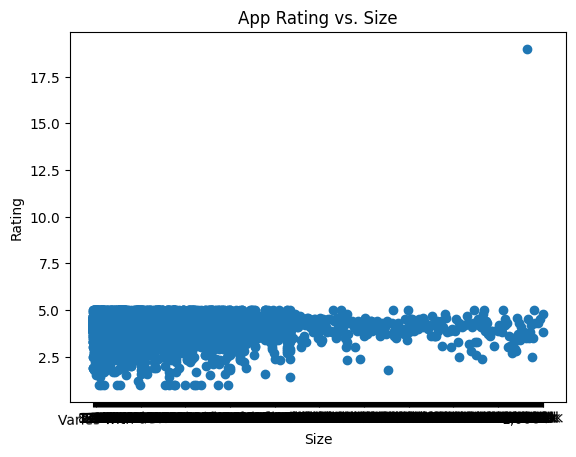

In [38]:
import matplotlib.pyplot as plt
df_size_rating['Size'] = pd.to_numeric(df_size_rating['Size'])

plt.scatter(x=df["Size"],y=df["Rating"])

# set the rotation angle of the x-axis tick labels to 0 degrees
plt.xticks(rotation=1)

# add a title and axis labels to the plot
plt.title('App Rating vs. Size')
plt.xlabel('Size')
plt.ylabel('Rating')

# show the plot
plt.show()

## Interpretation
- #### The scatter plot above shows that apps with sizes ranging from 1MB to 50MB tend to have higher ratings compared to apps with larger sizes. This suggests that users may prefer apps that are not too large in size, possibly because they take less time to download and use less storage space on their devices. On the other hand, apps that are very small in size (less than 1MB) or very large in size (more than 50MB) appear to have lower ratings, indicating that they may not be as popular among users

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [2]:
df_type_price = df[["Type","Price"]]

In [3]:
df_type_price["Type"].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Dropping nan
df_type_price.dropna(inplace=True)

In [7]:
df_type_price["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [8]:
# Replace "Everyone" with "0" in "Price" column
df_type_price["Price"] = df_type_price["Price"].str.replace("Everyone", "0")

# Replace "0" with "Free" in "Type" column
df_type_price["Type"] = df_type_price["Type"].str.replace("0", "Free")


In [9]:
# Drop special character
chars_to_remove=['+',',','$']
cols_to_clean=['Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_type_price[cols]=df_type_price[cols].str.replace(item,'')

In [10]:
df_type_price["Price"] = df_type_price["Price"].astype(float)

<Axes: xlabel='Type'>

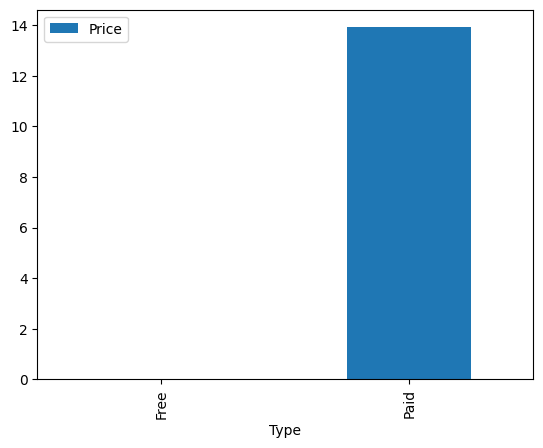

In [13]:
df_type_price.groupby("Type").mean().plot(kind="bar")

## Interpretation
- ### The count plot of the "Type" column indicates that there are significantly more free apps in the dataset than paid apps. This suggests that people tend to use more free apps than paid apps,

## Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [14]:
df_app_install = df[["App","Installs"]]

In [15]:
# Drop special character
chars_to_remove=['+',',','$']
cols_to_clean=['Installs']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_app_install[cols]=df_app_install[cols].str.replace(item,'')

In [16]:
df_app_install["Installs"]= df_app_install["Installs"].str.replace("Free","0")

In [40]:
df_app_install.sort_values("Installs", ascending=False)[:10]

,App,Installs
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000
474,LINE: Free Calls & Messages,500000000
5596,Samsung Health,500000000
371,Google Duo - High Quality Video Calls,500000000
3767,Flipboard: News For Our Time,500000000
2610,Snapchat,500000000
3450,Microsoft Word,500000000
1920,Temple Run 2,500000000
4566,SHAREit - Transfer & Share,500000000
3934,Microsoft Word,500000000


In [44]:
temp["Installs"] = temp["Installs"].astype("float")
import seaborn as sns


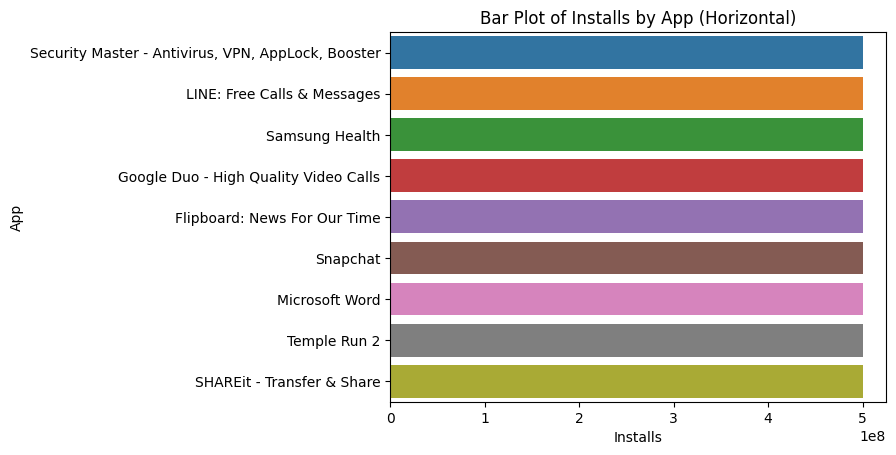

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the "Installs" column to numeric format
temp["Installs"] = pd.to_numeric(temp["Installs"])

# Create a horizontal bar plot
sns.barplot(x="Installs", y="App", data=temp, orient="h")

# Set labels and title
plt.xlabel("Installs")
plt.ylabel("App")
plt.title("Bar Plot of Installs by App (Horizontal)")

# Show the plot
plt.show()


## Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach thistask, and what features would you analyze to make recommendations to the company?

`Analyzing the Google Playstore dataset to identify the most popular app categories involves data collection, data cleaning, EDA, feature analysis, statistical analysis, visualization, and making informed recommendations based on the findings. By using these steps, the company can make data-driven decisions on which app categories to target for their new app launch on the Google Playstore.`

In [2]:
import pandas as pd
df = pd.read_csv("google_cleaned.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

In [62]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
Rating,1.000000,0.068141,0.082134,0.051355,-0.021903,-0.012508,0.017254,0.137714
Reviews,0.068141,1.000000,0.233791,0.643122,-0.009667,-0.030141,0.045930,0.075537
Size,0.082134,0.233791,1.000000,0.164608,-0.022772,-0.010380,0.038639,0.205476
Installs,0.051355,0.643122,0.164608,1.000000,-0.011689,-0.053122,0.056447,0.089368
Price,-0.021903,-0.009667,-0.022772,-0.011689,1.000000,-0.008225,0.006943,-0.007897
Day,-0.012508,-0.030141,-0.010380,-0.053122,-0.008225,1.000000,-0.079856,-0.016433
Month,0.017254,0.045930,0.038639,0.056447,0.006943,-0.079856,1.000000,-0.187306
Year,0.137714,0.075537,0.205476,0.089368,-0.007897,-0.016433,-0.187306,1.000000


To identify the most popular app categories on the Google Playstore, I would analyze the following features based on their correlation values from the given correlation table:

- 1. Reviews: The higher the number of reviews an app has, the more popular it is likely to be. A higher correlation value with other features suggests that reviews could be a significant factor in determining app popularity.

- 2. Installs: The number of installs an app has can also be an indicator of its popularity. A higher correlation value with other features suggests that app installs could be an important factor in determining app popularity.

- 3. Size: The size of an app could also impact its popularity. Smaller apps are generally preferred due to limited device storage space. A higher correlation value with other features suggests that app size could be a factor in determining app popularity.

- 4. Price: The price of an app could influence its popularity. Users may prefer free or lower-priced apps over expensive ones. A negative correlation value with other features suggests that app price could be a factor in determining app popularity, with lower prices potentially being more popular.

- 5. Based on the given correlation table, the features with the highest positive correlation values with the `Rating` feature are `Reviews` and `Year`. This suggests that apps with higher reviews and more recent release years may be more popular.

In addition to the above features, I would also consider other factors such as the genre or category of the app, user ratings, and user feedback, which could provide valuable insights into app popularity on the Google Playstore. Analyzing user reviews and ratings can give an indication of user satisfaction and help identify popular app categories.

Overall, a comprehensive analysis of features such as `reviews`, `installs`, `size`, `price`, and `other relevant factors`, combined with qualitative analysis of app genre, ratings, and user feedback, would provide a robust approach to identify the most popular app categories on the Google Playstore and make recommendations to the company for their new app launch.

## Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers on the Google Playstore dataset, some of the features that could be analyzed are:

1. `Rating`: The average rating of the apps developed by each developer could be calculated and analyzed to identify the most highly rated developers.

2. `Reviews`: The total number of reviews for each developer's apps could be analyzed to determine the level of engagement and user satisfaction.

3. `Installs`: The total number of app installs for each developer's apps could be analyzed to identify the most popular and successful developers.

4. `Price`: The average price of the apps developed by each developer could be analyzed to determine the developer's profitability and revenue potential.

5. `Category`: The category of the apps developed by each developer could be analyzed to determine which categories have the most successful developers.

6. `Content Rating`: The content rating of the apps developed by each developer could be analyzed to determine which developers are most successful in developing apps for specific age groups.

7. `Last Updated`: The date when each developer last updated their apps could be analyzed to determine which developers are actively maintaining and improving their apps.

To present the findings, various data visualizations could be used, including:

1. `Bar charts`: Bar charts could be used to compare the total number of installs, reviews, and ratings of the apps developed by each developer.

2. `Scatter plots`: Scatter plots could be used to analyze the relationship between the rating and number of reviews or installs of the apps developed by each developer.

3. `Heat maps`: Heat maps could be used to analyze the distribution of the apps developed by each developer across different categories and content ratings.

4. `Line charts`: Line charts could be used to analyze the trend in the number of installs, reviews, and ratings of the apps developed by each developer over time.

5. `Pie charts`: Pie charts could be used to analyze the distribution of the apps developed by each developer across different price ranges or categories.

# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Playstore dataset, some of the features that could be analyzed are:

1. `Monthly trends`: The number of app installs, ratings, and reviews over the past few months could be analyzed to determine whether there is a pattern or trend in terms of the popularity of apps during different months.

2. `Category`: The category of the new app could be analyzed to determine which categories have higher demand and popularity during different months.

3. `Competition`: The number of new apps launched by other developers in the same category could be analyzed to determine whether there is a peak season for app launches.

4. `User demographics`: The age group and location of the users who install and review apps in different months could be analyzed to determine which months have a higher number of active users.

To present the findings, various data visualizations could be used, including:

1. `Line charts`: Line charts could be used to compare the monthly trends in app installs, ratings, and reviews for different categories of apps.

2. `Heat maps`: Heat maps could be used to analyze the distribution of the new app launches across different categories and months.

3. `Bar charts`: Bar charts could be used to compare the number of new app launches in different categories and months.

4. `Scatter plots`: Scatter plots could be used to analyze the relationship between the number of new app launches and the number of installs, ratings, and reviews during different months.

5. `Pie charts`: Pie charts could be used to analyze the distribution of the active user demographics during different months.




